### Import all the required libraries :

In [ ]:
import pandas as pd   # for data manipulation and data analysis
import numpy as np  # for mathematical operations
import seaborn as sns   # drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt   # plotting library; creates static, interactive and animated visualizations in Python
import zipfile   # tool to create, read, write, append and list a ZIP file

import cv2  # focused on computer vision tasks; including image processing and video capturing

import tensorflow as tf
   # a deep learning library for numerical computation and machine learning
from tensorflow.python.keras import Sequential
   # Imports the Sequential model, a linear stack of layers in Keras (Tensorflow's highlevel API for building neural network).
from tensorflow.keras import layers, optimizers
   # imports modules for defining neural network layers and optimization algorithms.
from tensorflow.keras.applications.resnet50 import ResNet50
   # a pre-trained deep learning model used for image classification and other vision tasks.
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
   # Imports the Model class for crating complex neural network architectures and the load_model function to load pre-trained models.
from tensorflow.keras.initializers import glorot_uniform
   # Glarot uniform initializer is used for initializing the weights of neural network layers
from tensorflow.keras.utils import plot_model
   # plot_model utility is used to visualize the architecture of a neural network.
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
   # Imports various callback functions to control training dynamics, such as reducing learning rate on plateau, early stopping,
   # saving the best model checkpoint and scheduling learning rates
from tensorflow.keras import backend as K
   # Keras backend allows for operations directly on Tensorflow, Theano or CNTK backend
from IPython.display import display
   # Provides tools to display rich media in Jupyter Notebooks

from sklearn.preprocessing import StandardScaler, normalize
   # Imports tools for preprocessing data, including standard scaling and normalization
from sklearn.cluster import KMeans
   # clustering algorithm
from sklearn.decomposition import PCA
   # Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.metrics import silhouette_score
   # Metric to evaluate the quality of clusters formed by clustering algorithms
from sklearn.manifold import TSNE
   # t-Distributed Stochastic Neighbor Embedding (t-SNE), a tool for visualizing high-dimensional data.
from sklearn.metrics.pairwise import cosine_similarity
   # compute cosine similarity between pairs of vectors

import plotly.express as px
   # High level interface for quick and easy visualizations
import plotly.graph_objects as go
   # Plotly's graph objects module, which provided more granular control over visualizations.

from google.colab import files
   # Imports utilities to handle file uploads and downloads in Google Colab
%matplotlib inline
   # A magic function in IPython that renders matplotlib plots inline within a Jupyter Notebook

In [ ]:
sales_df = pd.read_csv("/content/drive/MyDrive/Projects/ML Projects/AI in Business (Marketing)/sales_data_sample.csv", encoding = 'unicode_escape')

The `encoding='unicode_escape'` parameter in the `pd.read_csv()` function call specifies the encoding used to decode the file being read. Here’s an explanation of `unicode_escape` and its use in this context:

### Unicode Escape Encoding

- **Unicode Escape Encoding**: `unicode_escape` is an encoding scheme that interprets backslash escape sequences in the input text as Unicode characters. This encoding can handle characters that are not part of the ASCII character set by using escape sequences.

### Use in the Code

- **Purpose in the Code**: The `unicode_escape` encoding is used to handle special characters in the CSV file that might cause issues if read with the default encoding. This is particularly useful when the CSV file contains non-ASCII characters or special characters represented by escape sequences.
- **Preventing Errors**: By using `unicode_escape`, you can prevent potential decoding errors that might occur if the file contains characters outside the default ASCII range, ensuring that the file is read correctly.

### Example Scenario

- **Special Characters**: If your CSV file contains characters such as accented letters (e.g., é, ü), currency symbols (e.g., €, £), or other Unicode characters, using `unicode_escape` helps interpret these characters properly without raising errors or misinterpreting the data.

### When to Use

- **Non-Standard Characters**: If you suspect or know that your CSV file includes characters outside the basic ASCII set, using `unicode_escape` can be a good practice to ensure that the file is read without issues.
- **Data from Various Sources**: When dealing with CSV files from diverse sources where encoding standards might vary, using a specific encoding like `unicode_escape` can help standardize the reading process.

In summary, the `unicode_escape` encoding is specified to handle any special or non-ASCII characters in the `sales_data_sample.csv` file, ensuring that it is read correctly without any encoding-related errors.

In [ ]:
sales_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


MSRP is the Manufacturer's suggested retail price (MSRP) or sticker price represents the suggested retail price of products.

MSRP is used to standardize the price of products over multiple company store location.

In [ ]:
# data-types
sales_df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
# Convert the ORDERDATE column to datetime format
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'], format='%m/%d/%Y %H:%M')
sales_df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [ ]:
# Find out if there are any null values in the data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [ ]:
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
# We can drop all the columns which have null values as these values are not that much important for us with respect to our problem statement.
# Also, we can remove all other address specific elements as we want country specific data more.
df_drop = ['ORDERNUMBER', 'ADDRESSLINE2', 'STATE', 'TERRITORY', 'POSTALCODE', 'PHONE', 'ADDRESSLINE1', 'CITY', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME']
sales_df = sales_df.drop(df_drop, axis = 1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [ ]:
sales_df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

Find number of unique values and entries

In [ ]:
sales_df['COUNTRY'].nunique()

19

In [ ]:
sales_df['PRODUCTLINE'].nunique()

7

In [ ]:
sales_df['PRODUCTCODE'].nunique()

109

# Perform Exploratory Data Analysis and Data Cleaning - Part 1

We are going to use Plotly which is a Python graphy library that makes interactive, publication-quality graphs.
It is an alternative for seaborn or matplotlib.

Plotly_express is a high-level wrapper around plotly for rapid data exploration and figure generation.

In [ ]:
sales_df['COUNTRY'].value_counts().index  # tells unique countries

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object', name='COUNTRY')

In [ ]:
sales_df['COUNTRY'].value_counts()  # tells how many unique samples are present in each country

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [ ]:
def barplot_visualization(x) :
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = sales_df[x].value_counts().index, y = sales_df[x].value_counts(), color = sales_df[x].value_counts().index, height = 600)
  fig.show()

In [ ]:
barplot_visualization('COUNTRY')

In [ ]:
sales_df['STATUS'].nunique()

6

In [ ]:
barplot_visualization('STATUS')

As the difference between the shipped counts and all other remaining values, may be the status column is not more important for us so we can remove that.

In [ ]:
sales_df.drop(columns = ['STATUS'], inplace = True)
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,S72_3212,France,Small


In [ ]:
barplot_visualization('PRODUCTLINE')

In [ ]:
barplot_visualization('DEALSIZE')

In [ ]:
# Function to add dummy variables to replace categorical variables (One Hot Encoding)

def dummies(x) :
  dummy = pd.get_dummies(sales_df[x])
  sales_df.drop(columns = x, inplace = True)
  return pd.concat([sales_df, dummy], axis = 1)

In [ ]:
# Let's obtain dummy variables for the column 'COUNTRY'
sales_df = dummies('COUNTRY')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,False
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,True
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,...,False,False,False,False,False,True,False,False,False,False
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,...,False,False,False,False,False,False,False,False,False,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,...,False,False,False,False,False,True,False,False,False,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
sales_df = dummies('PRODUCTLINE')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Switzerland,UK,USA,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,False,False,False,False,True,False,False,False,False,False
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,False,False,False,False,True,False,False,False,False,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
sales_df = dummies('DEALSIZE')
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,S72_3212,...,False,False,False,True,False,False,False,False,False,True
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,True,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,True,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,S72_3212,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
y = pd.Categorical(sales_df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [ ]:
# The following function converts all the unique values into unique codes starting from 0
y = pd.Categorical(sales_df['PRODUCTCODE']).codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

We did this above instead of doing one hot encoding because if we do one hot encoding here then we will end up adding 109 extra columns to the dataset increasing the dimentionality issue.

In [ ]:
sales_df['PRODUCTCODE'] = pd.Categorical(sales_df['PRODUCTCODE']).codes

In [ ]:
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,108,...,False,False,False,True,False,False,False,False,False,True
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,108,...,False,False,False,True,False,False,False,False,True,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,108,...,False,False,False,True,False,False,False,False,True,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,108,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,54,108,...,False,False,False,True,False,False,False,False,False,True
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,54,108,...,False,False,False,True,False,False,False,False,True,False
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,54,108,...,False,False,False,True,False,False,False,False,True,False
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,54,108,...,False,False,False,True,False,False,False,False,False,True


# Perform Exploratory Data Analysis and Data Cleaning - Part 2

In [ ]:
# Group data by Order Date
sales_df_group = sales_df.groupby(by = "ORDERDATE").sum()
sales_df_group

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37,0,...,0,0,0,0,0,0,2,0,1,1
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723,0,...,3,0,0,0,0,7,6,0,10,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720,0,...,7,0,0,0,2,4,0,0,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,561.18,21,31821.90,12,30,12030,728,101,0,...,0,6,0,0,0,0,0,2,3,1
2005-05-17,509,1269.43,105,59475.10,28,70,28070,1669,462,0,...,14,0,0,0,0,0,0,2,8,4
2005-05-29,607,1148.40,94,51233.18,30,75,30075,1328,797,13,...,7,0,0,0,0,0,8,0,8,7


In [ ]:
# find when the sales generally peak (which months?)
fig = px.line(x = sales_df_group.index, y = sales_df_group.SALES, title = "Sales")
fig.show()

From the graph above we can conclude that the peak occurs in november in both the years.

In [ ]:
# We can drop 'ORDERDATE' and keep the rest of the date-related data such as 'MONTH' because we already have other date related information such as 'ORDER ID' and 'YEAR ID'
sales_df.drop("ORDERDATE", axis = 1, inplace = True)
sales_df.shape

(2823, 38)

## Correlation Matrix :

<Axes: >

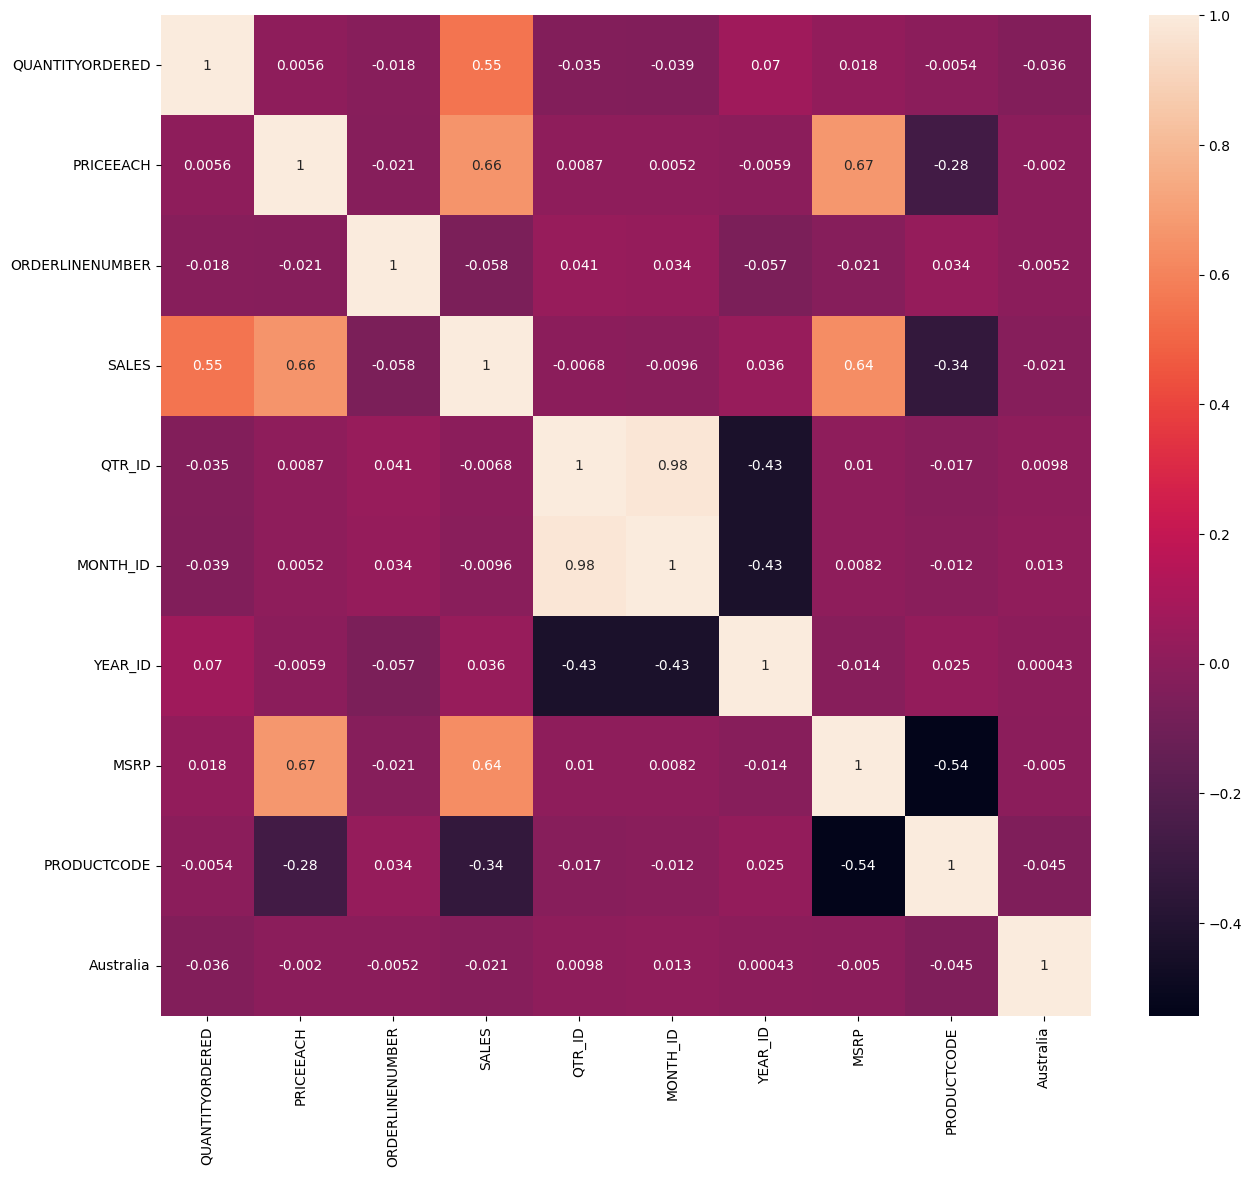

In [ ]:
plt.figure(figsize = (15, 13))
corr_matrix = sales_df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot = True)

In [ ]:
# It looks like the Quarter ID and the monthly IDs are highly correlated
# Hence we can drop one of them
# Let's drop 'QTR_ID' (or 'MONTH_ID')
sales_df.drop('QTR_ID', axis = 1, inplace = True)
sales_df.shape

(2823, 37)

### Let's plot distplots (distribution plots)
Distplots shows the (1) histogram, (2) kde plot and (3) rug plot.

(1) Histogram : It's graphical display of data using bars with various heights. Each bar groups numbers into ranges and taller bars show that more points lie into that range

(2) Kde Plot : Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.

(3) Rug Plot : plot of data for a single quantitative variable, displayed as marks along an axis (one-dimensional scatter plot).

In [ ]:
import plotly.figure_factory as ff

plt.figure(figsize = (10, 10))

for i in range(8) :
  if sales_df.columns[i] != 'ORDERLINENUMBER' :
    fig = ff.create_distplot([sales_df[sales_df.columns[i]].apply(lambda x : float(x))], ['distplot'])
    fig.update_layout(title_text = sales_df.columns[i])
    fig.show()

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Visualize the relationship between variables using pairplots
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(sales_df,
                        dimensions = sales_df.columns[:8],
                        color = 'MONTH_ID')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100
)

fig.show()

<Figure size 1500x1500 with 0 Axes>

A trend exists between 'SALES' and 'QUANTITYORDERED'

A trend exists between 'MSRP' and 'PRICEEACH'

A trend exists between 'PRICEEACH' and 'SALES'

It seems that sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs 'YEAR_ID')

Zoom in into 'SALES' and 'QUANTITYORDERED', you will be able to see the monthly information color coded on the graph.

# Understand the theory and intuition behind the K-Means Clustering Algorithm

K-Means Clustering Algorithm :
K-Means clustering is a popular unsupervised machine learning algorithm that groups unlabeled data points into predefined clusters. It's called "unsupervised" because the data points don't have predefined labels or categories. K-Means works by iteratively assigning data points to clusters based on their similarity and then recalculating the center (centroid) of each cluster.
Here's a breakdown of the K-Means algorithm with visuals:
1. Define the number of clusters (K):
This is a crucial step as it determines the number of groups your data will be divided into. You'll need to consider the structure of your data and experiment with different K values to find the optimal number of clusters.
2. Initialize centroids:
These are the initial representatives of each cluster, essentially random data points chosen from the dataset. Imagine them as starting points for your clusters.

3. Assign data points to nearest centroids:
Calculate the distance between each data point and all the centroids. Each data point is then assigned to the cluster with the closest centroid.
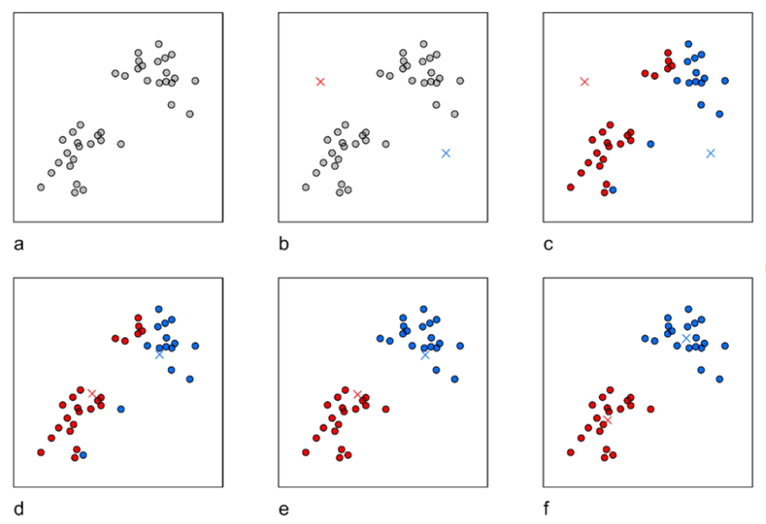
4. Recompute centroids:
For each cluster, the centroid is recalculated by taking the mean of all the data points assigned to that cluster. This essentially places the centroid at the center of its assigned data points.
5. Repeat steps 3 and 4:
Keep iterating through steps 3 and 4 until a stopping condition is met. This condition can be when the centroids no longer move significantly (indicating stable clusters) or when a predefined number of iterations is reached.
6. Visualizing the results:
Once the algorithm converges, you'll have your data points divided into distinct clusters. You can visualize this using scatter plots where different colors represent different clusters.
Here's a graph depicting the potential decrease in distortion (within-cluster sum of squares) as the number of clusters (K) increases:
(graph k means elbow method)
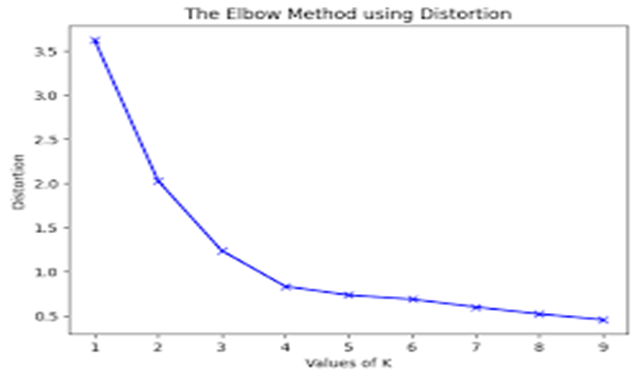
This graph, known as the Elbow Method, can help you identify the optimal K value. The point where the curve starts to flatten out (the elbow) is a good indicator of the number of clusters that best capture the inherent structure of your data.
Key points to remember about K-Means clustering :

•	It works best for datasets with well-defined spherical clusters.

•	The initial placement of centroids can influence the final clusters (different initializations can lead to slightly different results).

•	The algorithm is sensitive to outliers in the data.

•	It doesn't guarantee finding the globally optimal solution (it finds a local minimum for the within-cluster sum of squares).

K-Means is a powerful and versatile algorithm for data exploration and grouping. By understanding its core principles and limitations, you can effectively leverage it for various data analysis tasks.


# Find optimal number of clusters using Elbow Method :

In [ ]:
# Scale the data
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [ ]:
sales_df_scaled.shape

(2823, 37)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

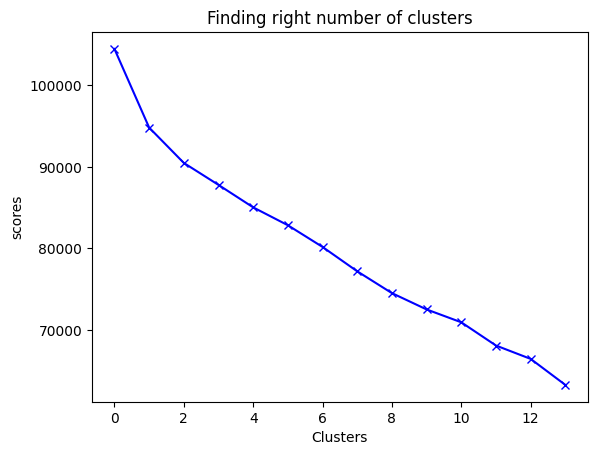

In [ ]:
scores = []

range_values = range(1, 15)

for i in range_values :
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(sales_df_scaled)
  scores.append(kmeans.inertia_) # inertia is the Sum of sqared distances of samples to their closest cluster center

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

# Apply K-Means Method

In [ ]:
# Cluster the data using K-means
kmeans = KMeans(5)
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
labels

array([1, 1, 3, ..., 4, 4, 4], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape # number of clusters, number of features

(5, 37)

In [ ]:
# Let's take a look at the cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,-0.029274,-0.027627,0.096004,0.002030,0.006272,-0.413767,0.098333,-0.109335,-0.264819,-0.140961,...,0.115670,-0.324602,-0.348674,-0.114641,0.226088,0.609936,-0.086488,-0.074847,-0.006159,0.040636
1,-0.465637,-0.767813,0.035397,-0.823904,0.006244,0.010110,-0.585439,0.183987,0.063805,-0.024578,...,-0.107914,0.068877,0.134260,-0.300637,0.084919,-0.024069,0.155295,-0.242672,-0.980703,1.096370
2,1.247208,0.800027,-0.270171,2.575664,-0.091005,0.152939,1.422435,-0.866101,-0.081137,0.046965,...,0.564409,0.019040,-0.160686,-0.300637,-0.127589,-0.198194,-0.144036,4.120788,-0.980703,-0.912100
3,0.276499,0.591360,-0.021912,0.474020,0.010829,-0.006149,0.412473,-0.259712,0.011739,0.027975,...,0.153649,0.023460,-0.014573,-0.300637,-0.043878,0.071931,-0.019704,-0.242672,1.019676,-0.912100
4,-0.052830,0.015937,0.094447,-0.276501,-0.030046,0.021935,-0.364827,1.124297,-0.229680,-0.015132,...,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.345470,-0.523371,-0.242672,-0.076184,0.188192


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,34.807692,83.101282,6.871795,3557.627051,7.115385,2003.525641,104.666667,50.320513,1.387779e-17,1.387779e-17,...,3.974359e-01,1.282051e-02,-5.551115e-17,5.128205e-02,6.410256e-02,2.948718e-01,1.794872e-01,3.846154e-02,4.871795e-01,4.743590e-01
1,30.557641,68.171206,6.615728,2036.637185,7.115282,2003.822163,77.192136,59.583557,8.132261e-02,1.608579e-02,...,2.913315e-01,1.394102e-01,1.501340e-01,1.068590e-15,4.110813e-02,9.919571e-02,2.788204e-01,6.036838e-16,-1.054712e-15,1.000000e+00
2,47.240260,99.795649,5.324675,8297.075130,6.759740,2003.922078,157.870130,26.422078,4.545455e-02,2.597403e-02,...,6.103896e-01,1.233766e-01,5.844156e-02,-9.714451e-17,6.493506e-03,4.545455e-02,1.558442e-01,1.000000e+00,-7.216450e-16,1.276756e-15
3,37.785829,95.586683,6.373591,4426.816224,7.132045,2003.810789,117.289050,45.571659,6.843800e-02,2.334944e-02,...,4.154589e-01,1.247987e-01,1.038647e-01,1.151856e-15,2.012882e-02,1.288245e-01,2.069243e-01,6.730727e-16,1.000000e+00,-7.771561e-16
4,34.578261,83.980000,6.865217,3044.702652,6.982609,2003.830435,86.056522,89.278261,8.695652e-03,1.739130e-02,...,6.106227e-16,-1.942890e-16,1.665335e-16,1.000000e+00,-1.040834e-16,1.526557e-16,4.718448e-16,-1.595946e-16,4.521739e-01,5.478261e-01


In [ ]:
labels.shape # Labels associated to each data points

(2823,)

In [ ]:
labels.max()

4

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(sales_df_scaled)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([2, 2, 3, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_kmeans.shape

(2823,)

In [ ]:
# Add a label (which cluster) corresponding to each data point
sale_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster' : labels})], axis = 1)
sale_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,False,False,...,True,False,False,False,False,False,False,False,True,1
1,34,81.35,5,2765.90,5,2003,95,0,False,False,...,True,False,False,False,False,False,False,False,True,1
2,41,94.74,2,3884.34,7,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,3
3,45,83.26,6,3746.70,8,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,3
4,49,100.00,14,5205.27,10,2003,95,0,False,False,...,True,False,False,False,False,False,False,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,False,False,...,False,False,True,False,False,False,False,False,True,4
2819,29,100.00,1,3978.51,1,2005,54,108,False,False,...,False,False,True,False,False,False,False,True,False,4
2820,43,100.00,4,5417.57,3,2005,54,108,False,False,...,False,False,True,False,False,False,False,True,False,4
2821,34,62.24,1,2116.16,3,2005,54,108,False,False,...,False,False,True,False,False,False,False,False,True,4


In [ ]:
sales_df['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x : float(x))

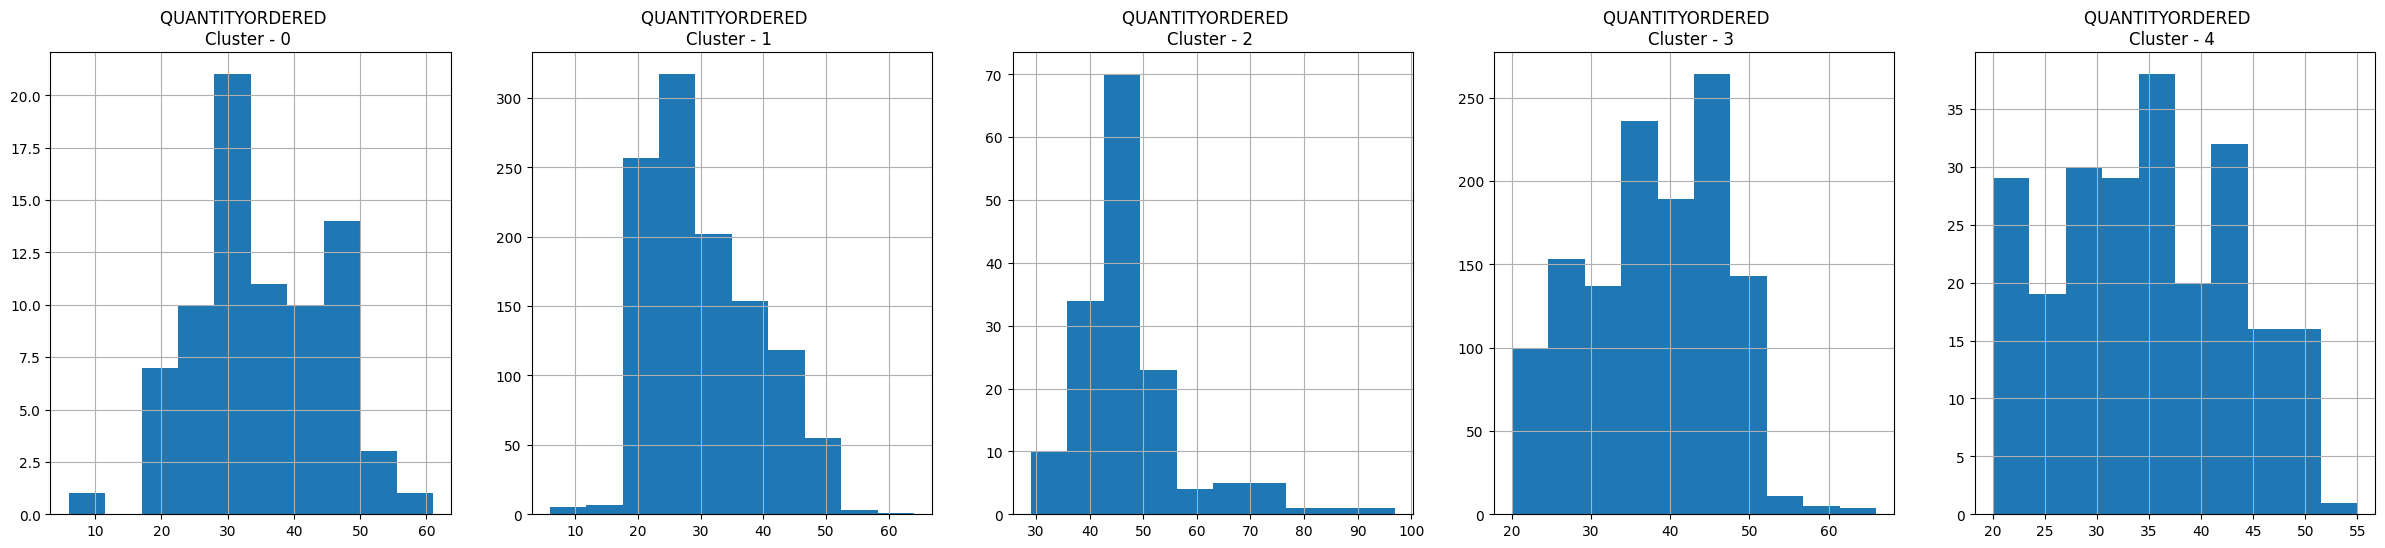

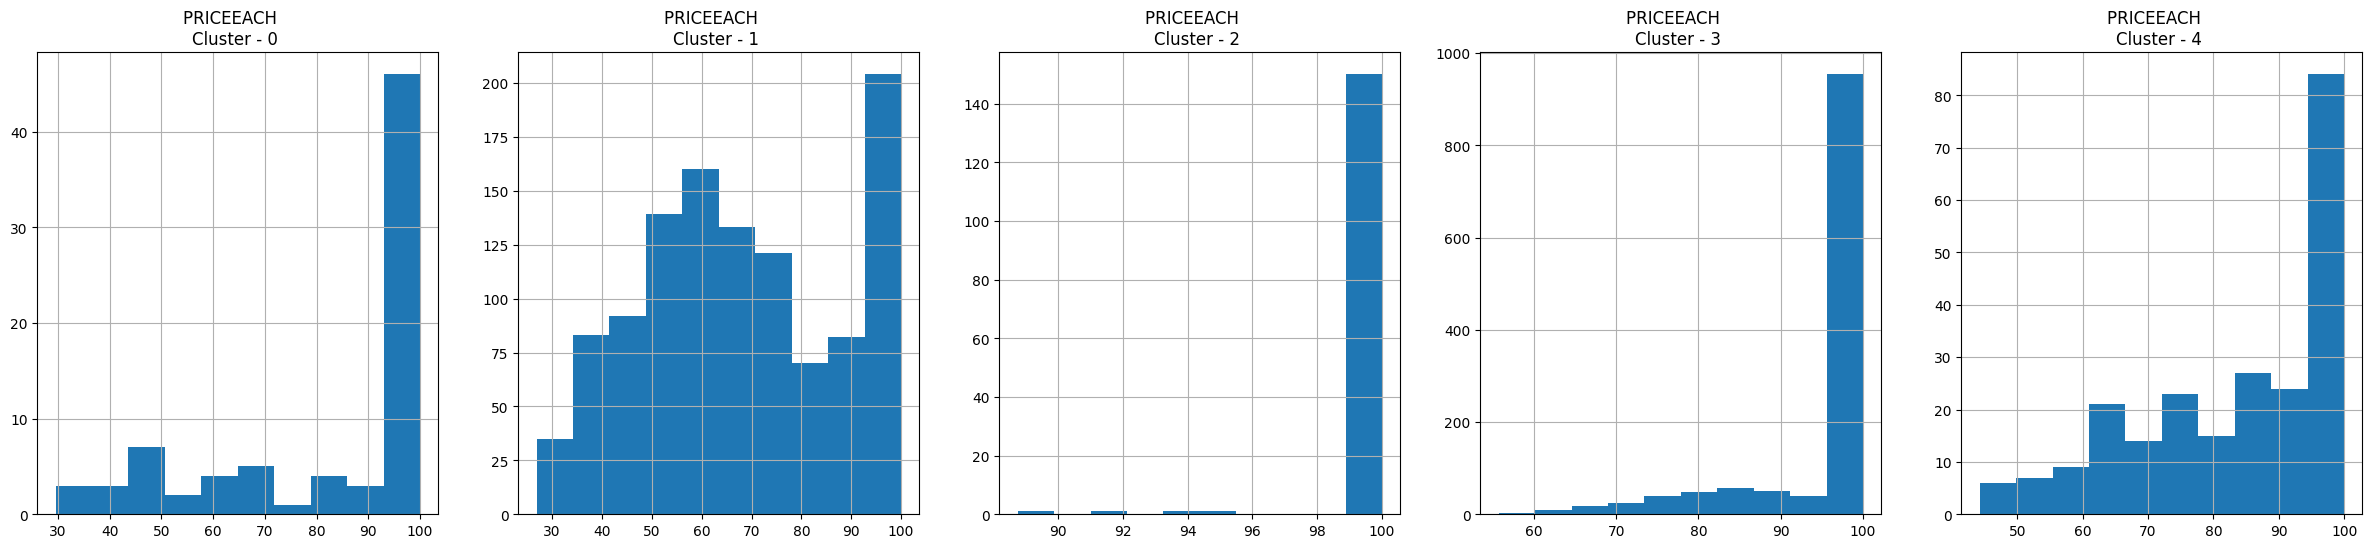

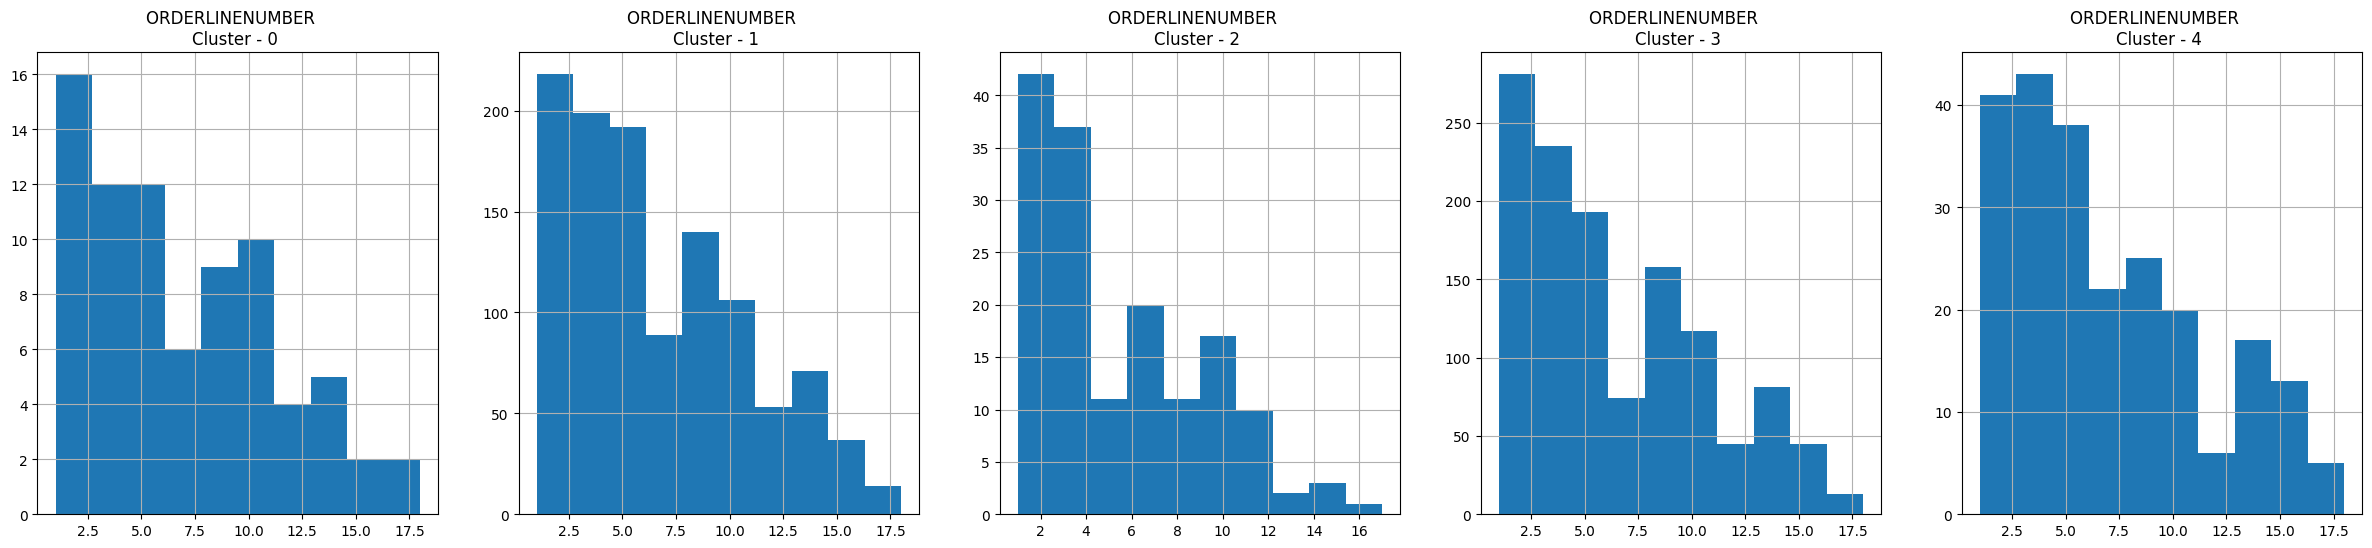

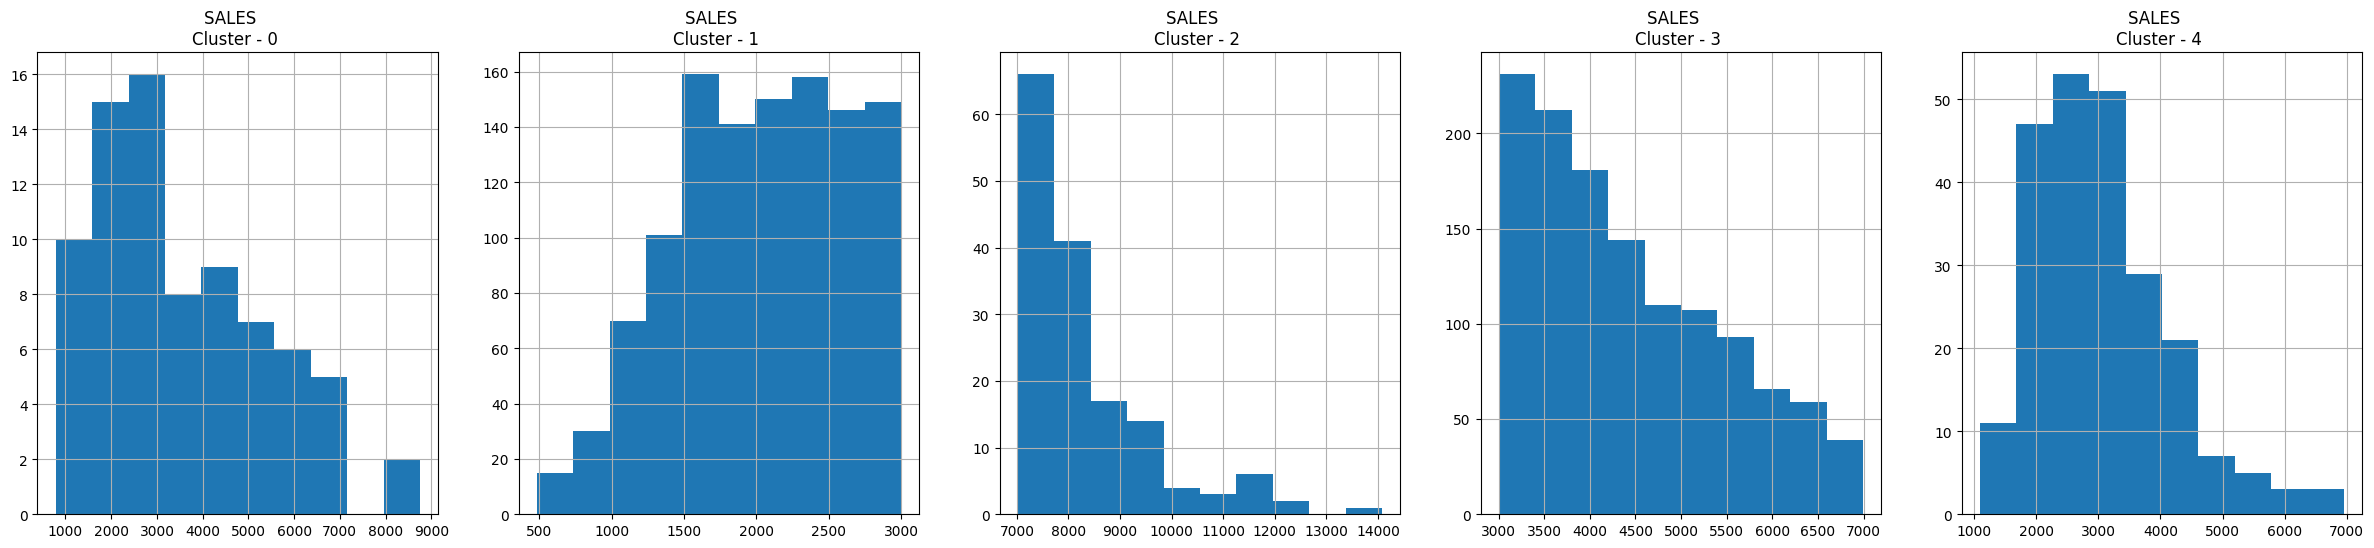

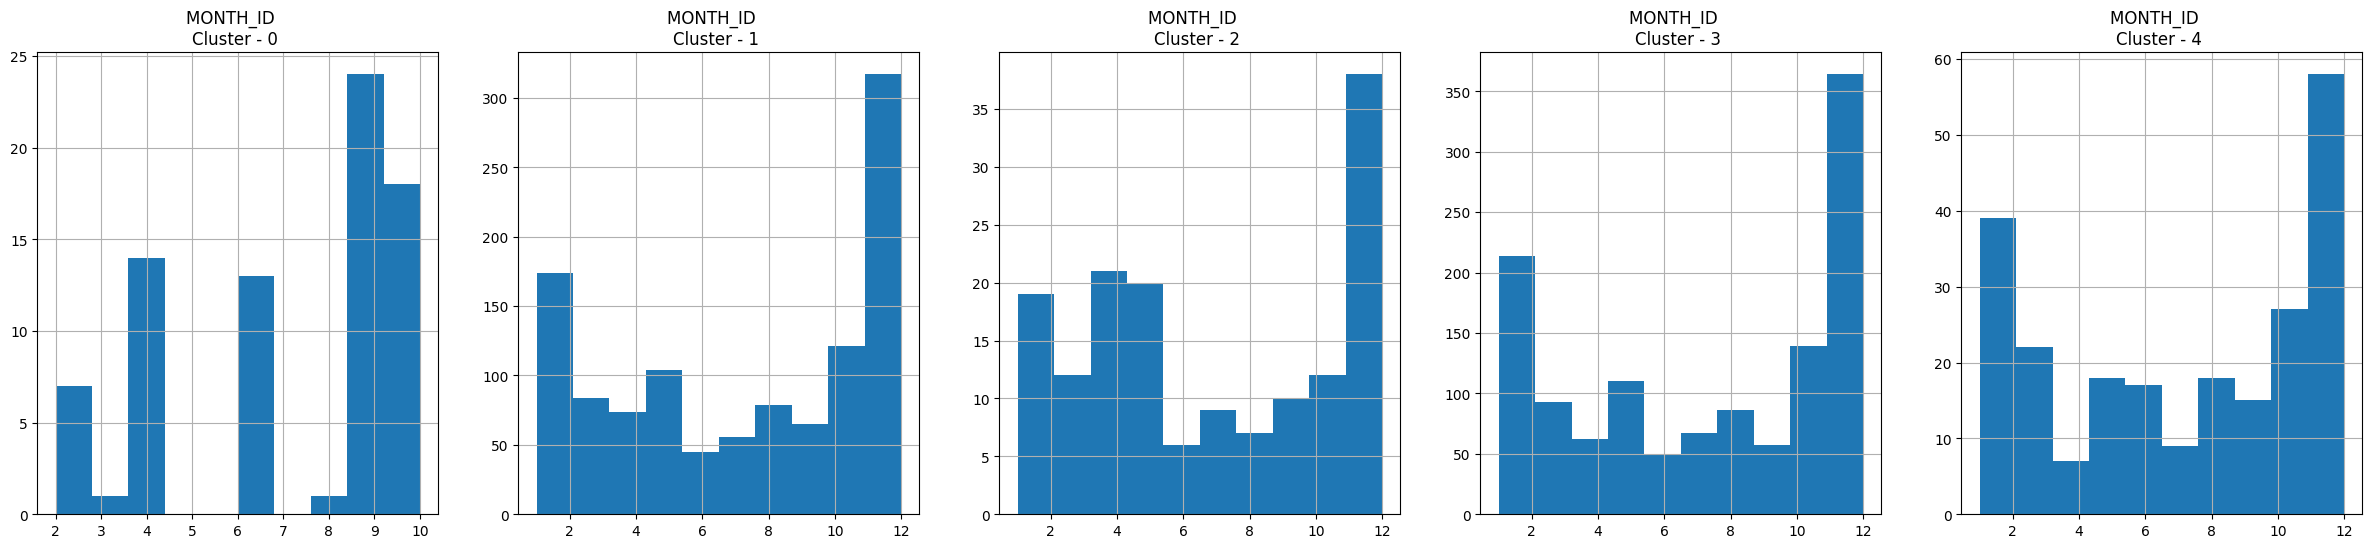

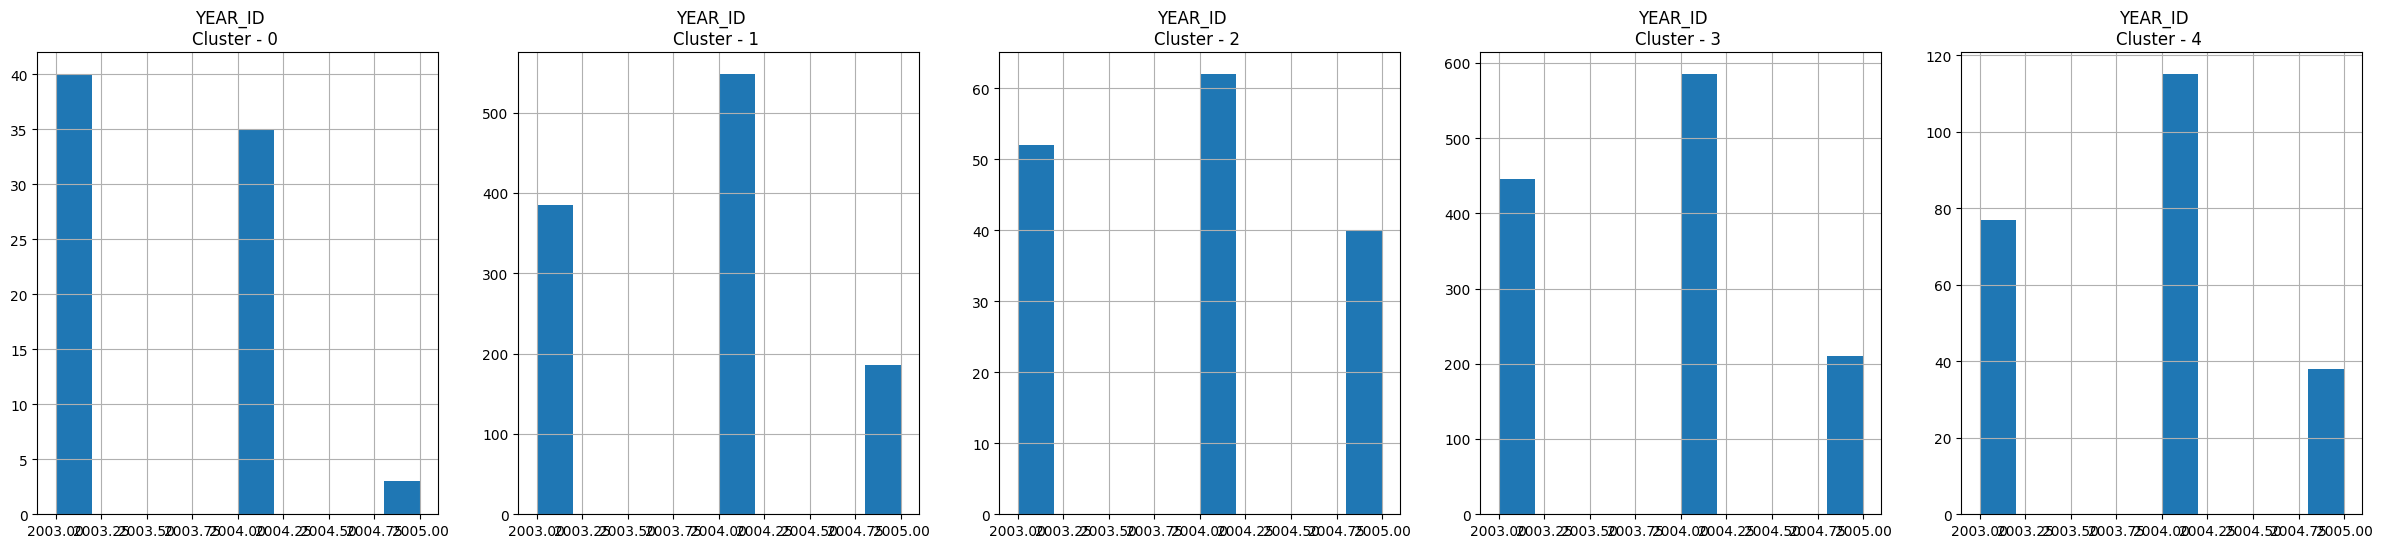

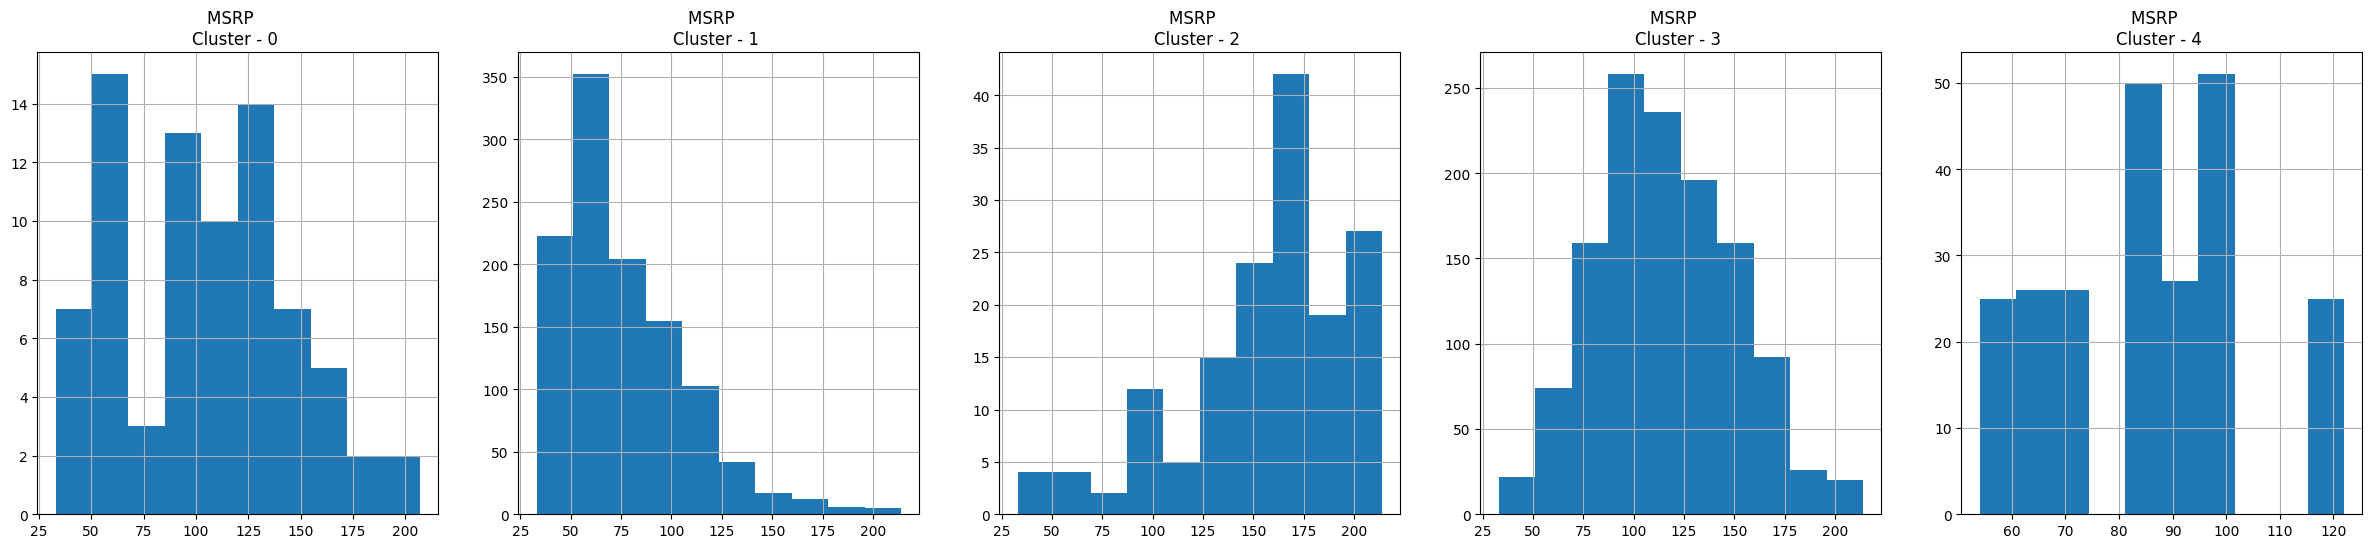

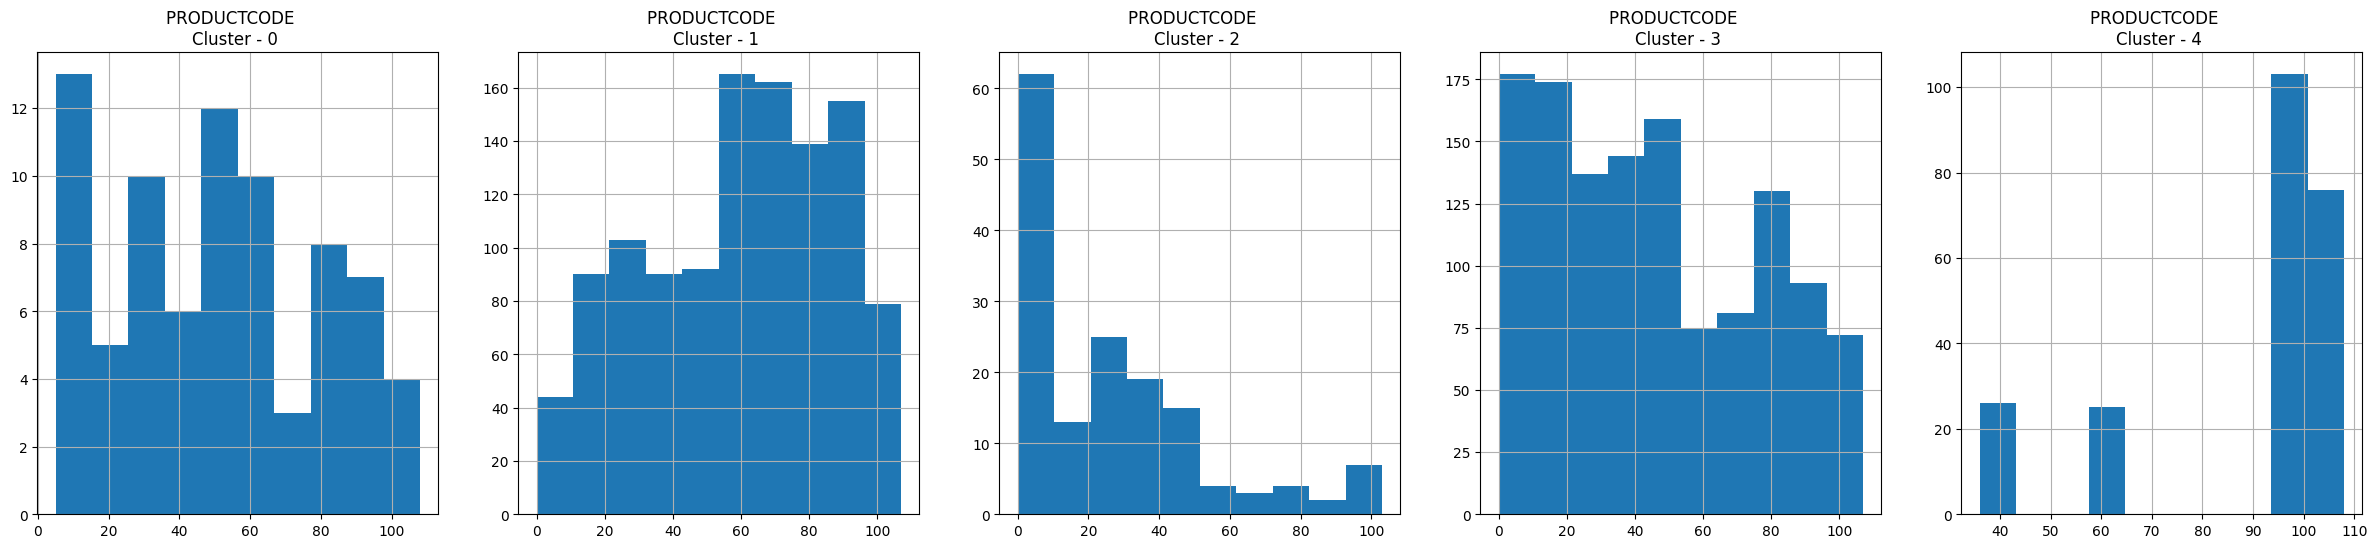

In [ ]:
# plot histogram for each features based on cluster
for i in sales_df.columns[:8] :
  plt.figure(figsize = (30, 6))
  for j in range(5) :
    plt.subplot(1, 5, j+1)
    cluster = sale_df_cluster[sale_df_cluster['cluster'] == j]
    cluster[i].hist()
    plt.title('{}   \nCluster - {} '.format(i, j))

  plt.show()

# Apply Principal Component Analysis and Visualize the results

In [ ]:
# Reduce the original data to 3 dimensions using PCA for visualizing the clusters
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48634039, -1.19084927,  0.99290424],
       [-0.78470709, -1.02110447,  1.39286346],
       [ 1.43144765,  0.12421159,  0.26876457],
       ...,
       [ 0.38985443,  4.10489665,  0.04196755],
       [-2.78887078,  2.36708936,  1.6313563 ],
       [-0.70553547,  3.30962526, -0.53475035]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.486340,-1.190849,0.992904
1,-0.784707,-1.021104,1.392863
2,1.431448,0.124212,0.268765
3,1.288385,-0.207041,-0.642177
4,1.975913,-0.113544,-1.186831


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster' : labels})], axis = 1)
pca_df

,pca1,pca2,pca3,cluster
0,-0.486340,-1.190849,0.992904,1
1,-0.784707,-1.021104,1.392863,1
2,1.431448,0.124212,0.268765,3
3,1.288385,-0.207041,-0.642177,3
4,1.975913,-0.113544,-1.186831,3
...,...,...,...,...
2818,-2.450415,1.102815,-1.476755,4
2819,-0.158275,3.704224,0.644524,4
2820,0.389854,4.104897,0.041968,4
2821,-2.788871,2.367089,1.631356,4


In [ ]:
# Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
                    color = 'cluster', symbol = 'cluster', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

In [ ]:
# Just for visualizationa and practice
# Reduce the original data to 2 dimensions using PCA for visualizing the clusters
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48618049, -1.24764512],
       [-0.78466805, -1.11509435],
       [ 1.43145942,  0.03363356],
       ...,
       [ 0.38995018,  4.18134432],
       [-2.7889253 ,  2.30936597],
       [-0.70548519,  3.30768133]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.486180,-1.247645
1,-0.784668,-1.115094
2,1.431459,0.033634
3,1.288510,-0.246745
4,1.976053,-0.154242


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster' : labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-0.486180,-1.247645,1
1,-0.784668,-1.115094,1
2,1.431459,0.033634,3
3,1.288510,-0.246745,3
4,1.976053,-0.154242,3
...,...,...,...
2818,-2.450273,1.158447,4
2819,-0.158007,3.750526,4
2820,0.389950,4.181344,4
2821,-2.788925,2.309366,4


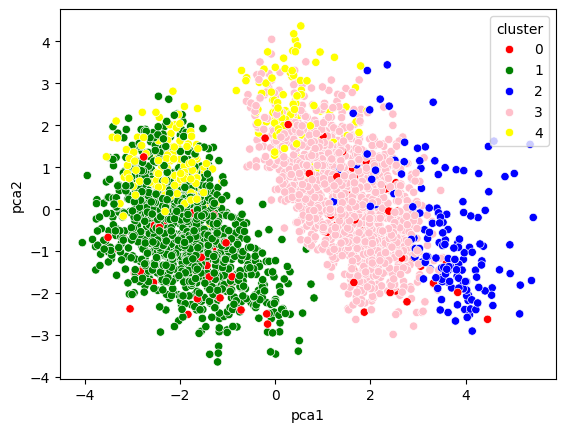

In [ ]:
# Visualize clusters using 3D-Scatterplot
fig = sns.scatterplot(x = 'pca1', y = 'pca2',
                    hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow'])
plt.show()

# Understand the theory and intuition behind AutoEncoders

Autoencoders are a type of artificial neural network used for unsupervised learning of efficient codings. The goal of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction or feature learning. Here’s an overview of how they work and their components:

### Structure of Autoencoders

1. **Encoder**: The encoder part of an autoencoder compresses the input into a latent-space representation. This is typically done using one or more layers of neural networks that transform the input data into a lower-dimensional space.
   
2. **Latent Space**: The compressed, lower-dimensional representation of the input data. This is also known as the bottleneck or code. It captures the essential features of the input data while discarding noise and redundancy.

3. **Decoder**: The decoder part reconstructs the input data from the latent-space representation. It typically mirrors the encoder in terms of structure but performs the opposite operation, transforming the low-dimensional code back into the original data's dimension.

### How Autoencoders Work

- **Training**: Autoencoders are trained using backpropagation to minimize the difference between the input and the reconstructed output. This difference is quantified using a loss function, such as mean squared error.
  
- **Objective**: The main objective is to learn a compact representation of the input data that can be used to accurately reconstruct the original input.

### Applications of Autoencoders

1. **Dimensionality Reduction**: Autoencoders can reduce the number of features in a dataset while preserving essential information, similar to Principal Component Analysis (PCA).

2. **Denoising**: Denoising autoencoders are trained to remove noise from input data. They can be used to clean images, audio signals, and more.

3. **Anomaly Detection**: Autoencoders can identify anomalies by measuring the reconstruction error. High reconstruction error indicates that the input data is significantly different from the training data, flagging it as an anomaly.

4. **Generative Models**: Variational Autoencoders (VAEs) are a type of autoencoder used for generating new data samples that are similar to the input data.

### Types of Autoencoders

1. **Vanilla Autoencoders**: The basic form with a simple encoder and decoder.

2. **Denoising Autoencoders**: Trained to remove noise from the input data.

3. **Sparse Autoencoders**: Regularized to have sparse activations in the hidden layer.

4. **Variational Autoencoders (VAEs)**: A probabilistic approach that models the latent space with a continuous, multi-dimensional distribution.

5. **Convolutional Autoencoders**: Use convolutional layers to better capture spatial hierarchies in data like images.

### Key Concepts

- **Bottleneck**: The narrowest part of the network, which forces the model to learn the most important features of the input data.
  
- **Reconstruction Loss**: A measure of how well the output data resembles the input data. Common losses include mean squared error (MSE) and binary cross-entropy.

- **Regularization**: Techniques like dropout, L1/L2 regularization, or sparsity constraints can be applied to prevent overfitting and encourage the model to learn more robust features.

Autoencoders are a powerful tool in machine learning for tasks that require understanding the underlying structure of data without labeled examples. Their ability to compress and reconstruct data makes them useful for various applications across different domains.

# Apply AutoEncoders (Perform Dimentionality Reduction using AutoEncoders)

In [ ]:
sales_df.shape

(2823, 37)

In [ ]:
sales_df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER     float64
SALES               float64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Australia              bool
Austria                bool
Belgium                bool
Canada                 bool
Denmark                bool
Finland                bool
France                 bool
Germany                bool
Ireland                bool
Italy                  bool
Japan                  bool
Norway                 bool
Philippines            bool
Singapore              bool
Spain                  bool
Sweden                 bool
Switzerland            bool
UK                     bool
USA                    bool
Classic Cars           bool
Motorcycles            bool
Planes                 bool
Ships                  bool
Trains                 bool
Trucks and Buses       bool
Vintage Cars           bool
Large                  bool
Medium              

In [ ]:
# Convert boolean columns to integers (0 for False, 1 for True)
sales_df = sales_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2.0,2871.00,2,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5.0,2765.90,5,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2.0,3884.34,7,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6.0,3746.70,8,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14.0,5205.27,10,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15.0,2244.40,12,2004,54,108,0,0,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1.0,3978.51,1,2005,54,108,0,0,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4.0,5417.57,3,2005,54,108,0,0,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1.0,2116.16,3,2005,54,108,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
from keras.optimizers import SGD
input_df = Input(shape = (37, ))
x = Dense(50, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(37, kernel_initializer = 'glorot_uniform')(x)     # size same as size of input

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - used for dimentionality reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [ ]:
autoencoder.fit(sales_df, sales_df, batch_size = 128, epochs = 500, verbose = 3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [ ]:
autoencoder.save_weights('autoencoder_1.h5')

In [ ]:
pred = encoder.predict(sales_df_scaled)

89/89 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

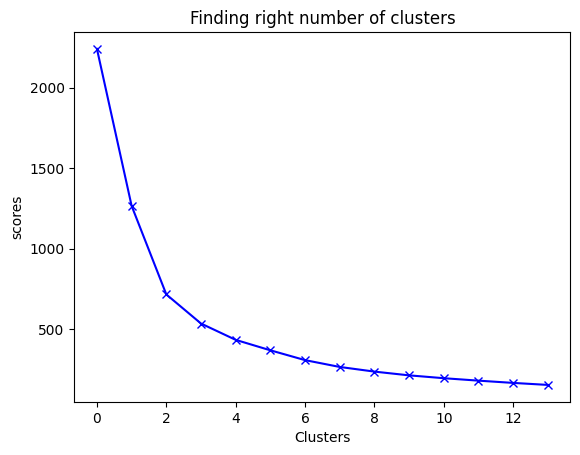

In [ ]:
scores = []

range_values = range(1, 15)

for i in range_values :
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

In [ ]:
# from graph we can clearly see that number of optimal number of clusters is 3
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(sales_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_cluster_dr = pd.concat([sales_df, pd.DataFrame({'cluster' : labels})], axis = 1)
df_cluster_dr.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2.0,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,2
1,34,81.35,5.0,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,2
2,41,94.74,2.0,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
3,45,83.26,6.0,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
4,49,100.00,14.0,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2


In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,1.245428,0.800220,-0.259579,2.573861,-0.088008,0.136857,1.430265,-0.871802,-0.084647,0.043374,...,0.580097,0.011712,-0.164278,-0.300637,-0.128350,-0.201008,-0.151285,4.120788,-0.980703,-0.91210
1,-0.468912,-0.724370,0.043454,-0.810304,0.007142,-0.003285,-0.581757,0.285478,0.025174,-0.016801,...,-0.162957,0.013781,0.072858,0.058660,0.071986,-0.044714,0.087993,-0.242672,-0.980703,1.09637
2,0.293073,0.580208,-0.010805,0.458608,0.003368,-0.012482,0.376634,-0.165542,-0.013717,0.010642,...,0.085141,-0.014094,-0.048853,-0.020232,-0.052121,0.064221,-0.064346,-0.242672,1.019676,-0.91210


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,0.044586,0.025478,...,0.617834,0.121019,0.057325,-6.938894e-17,0.006369,0.044586,0.152866,1.000000e+00,-7.216450e-16,1.387779e-15
1,30.525741,69.047496,6.649766,2061.682800,7.118565,2003.812793,77.340094,62.788612,0.071763,0.017161,...,0.265211,0.121685,0.131045,9.906396e-02,0.039002,0.092824,0.251170,6.869505e-16,-1.110223e-15,1.000000e+00
2,37.947254,95.361741,6.420520,4398.433699,7.104769,2003.806358,115.848988,48.545520,0.062139,0.020954,...,0.382948,0.112717,0.093208,7.731214e-02,0.018786,0.126445,0.188584,7.424616e-16,1.000000e+00,-3.885781e-16


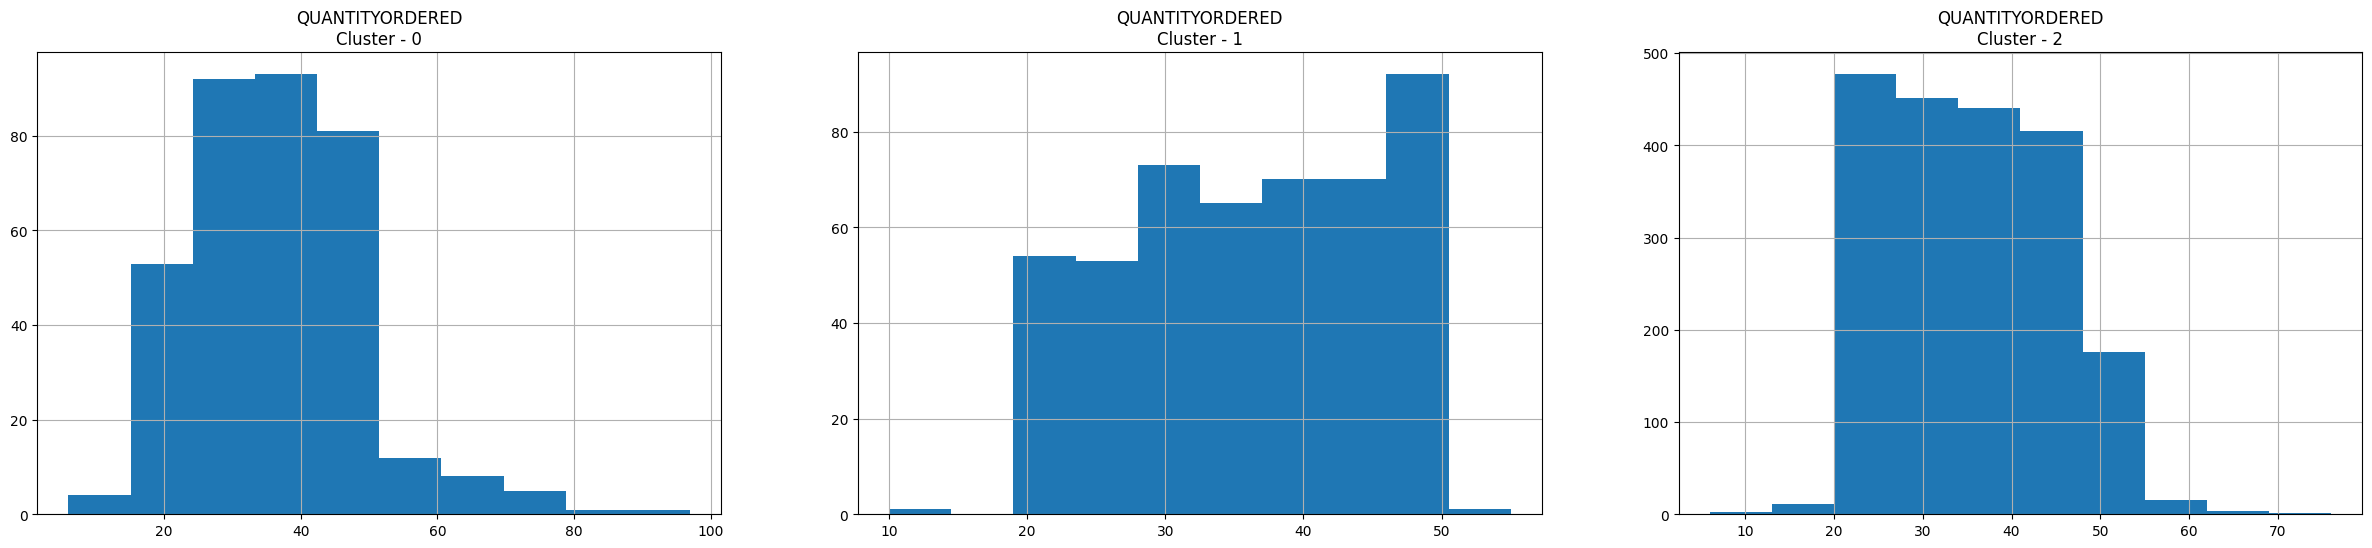

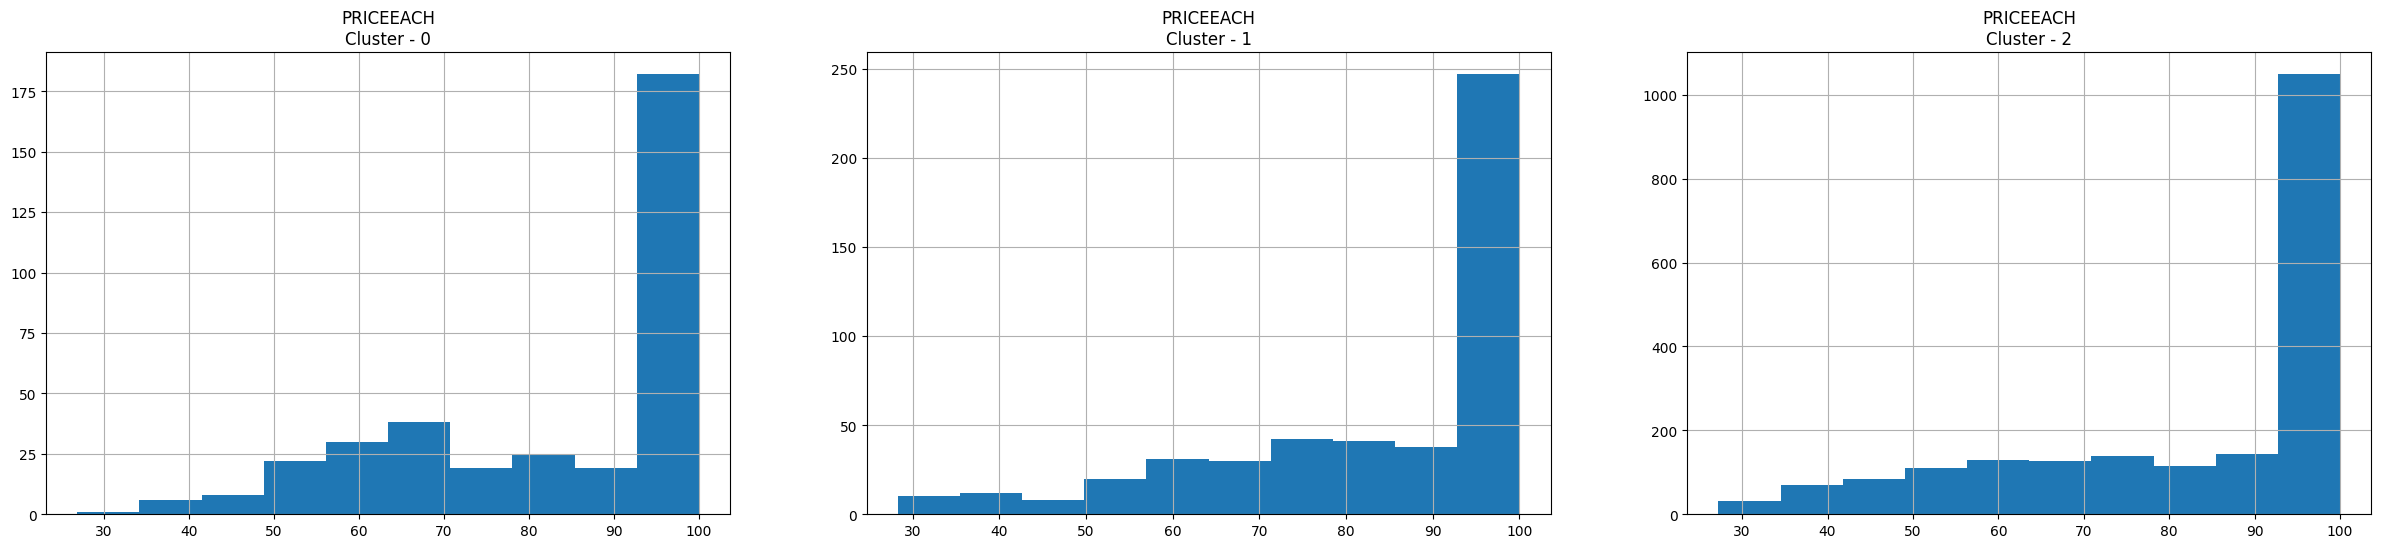

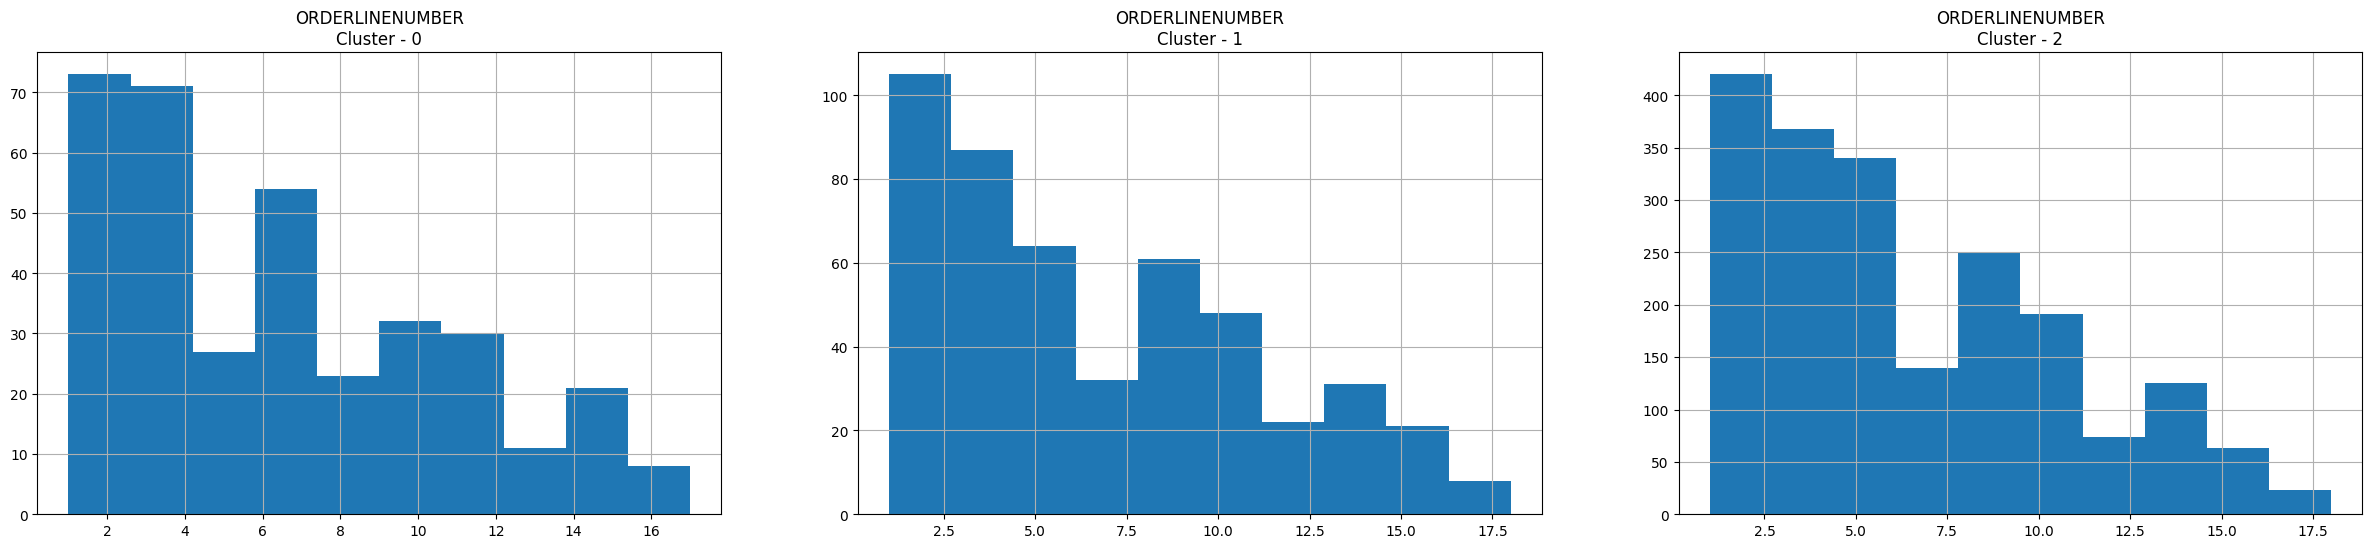

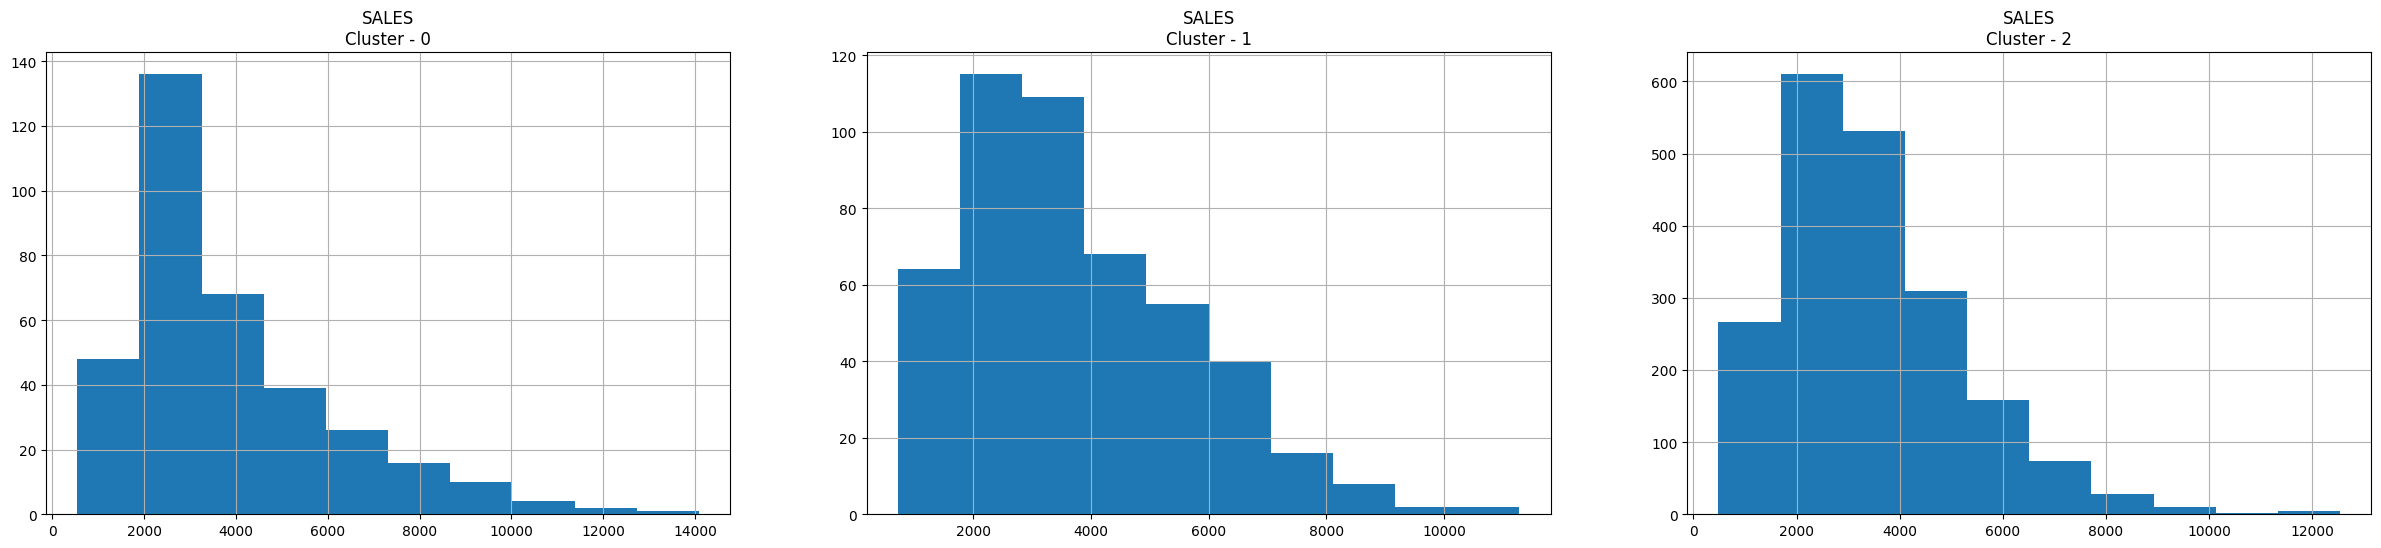

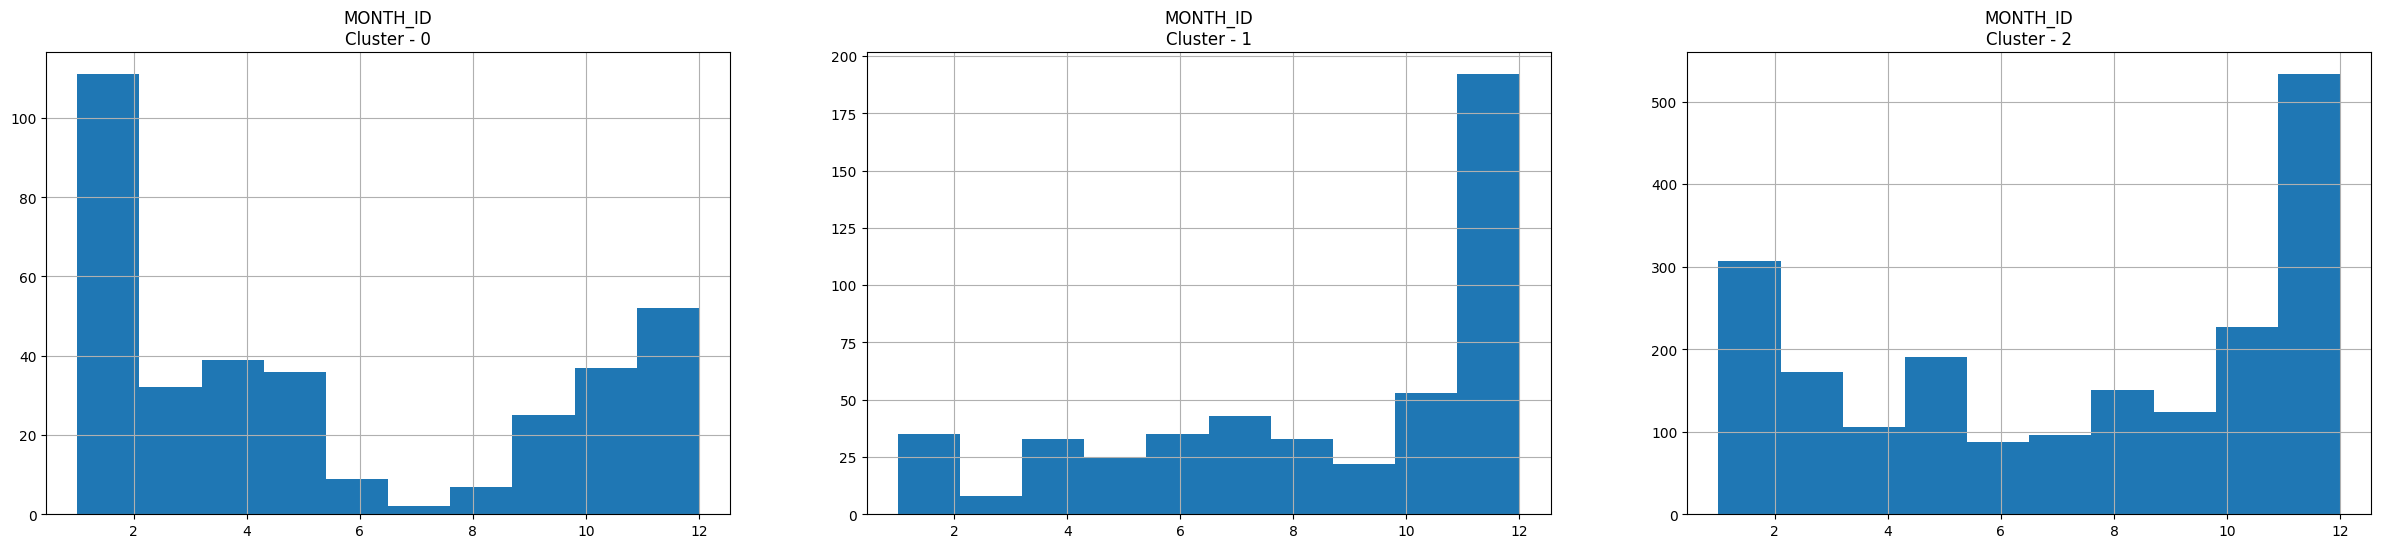

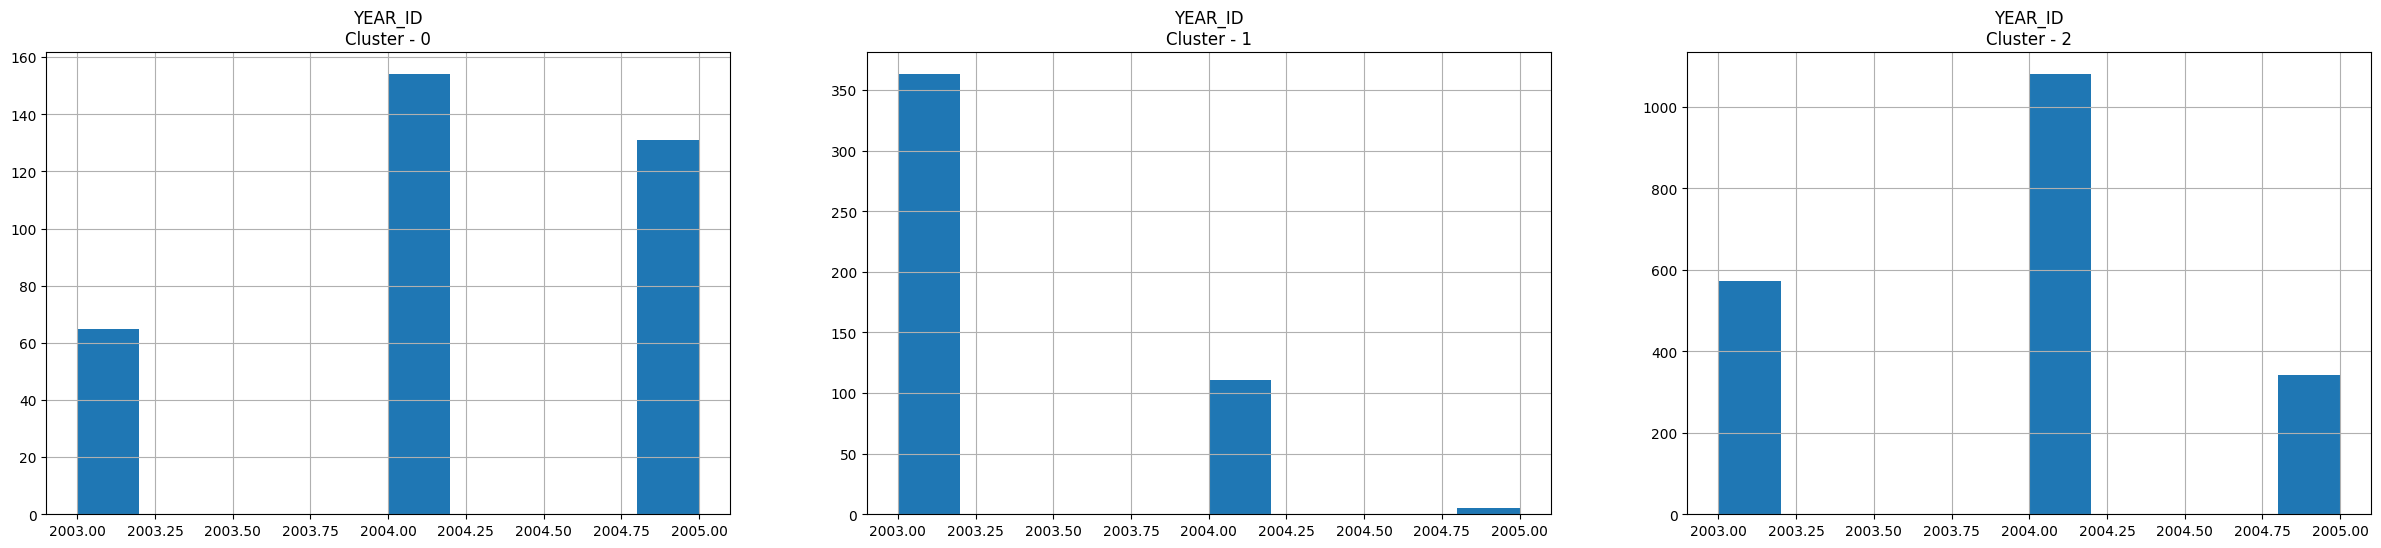

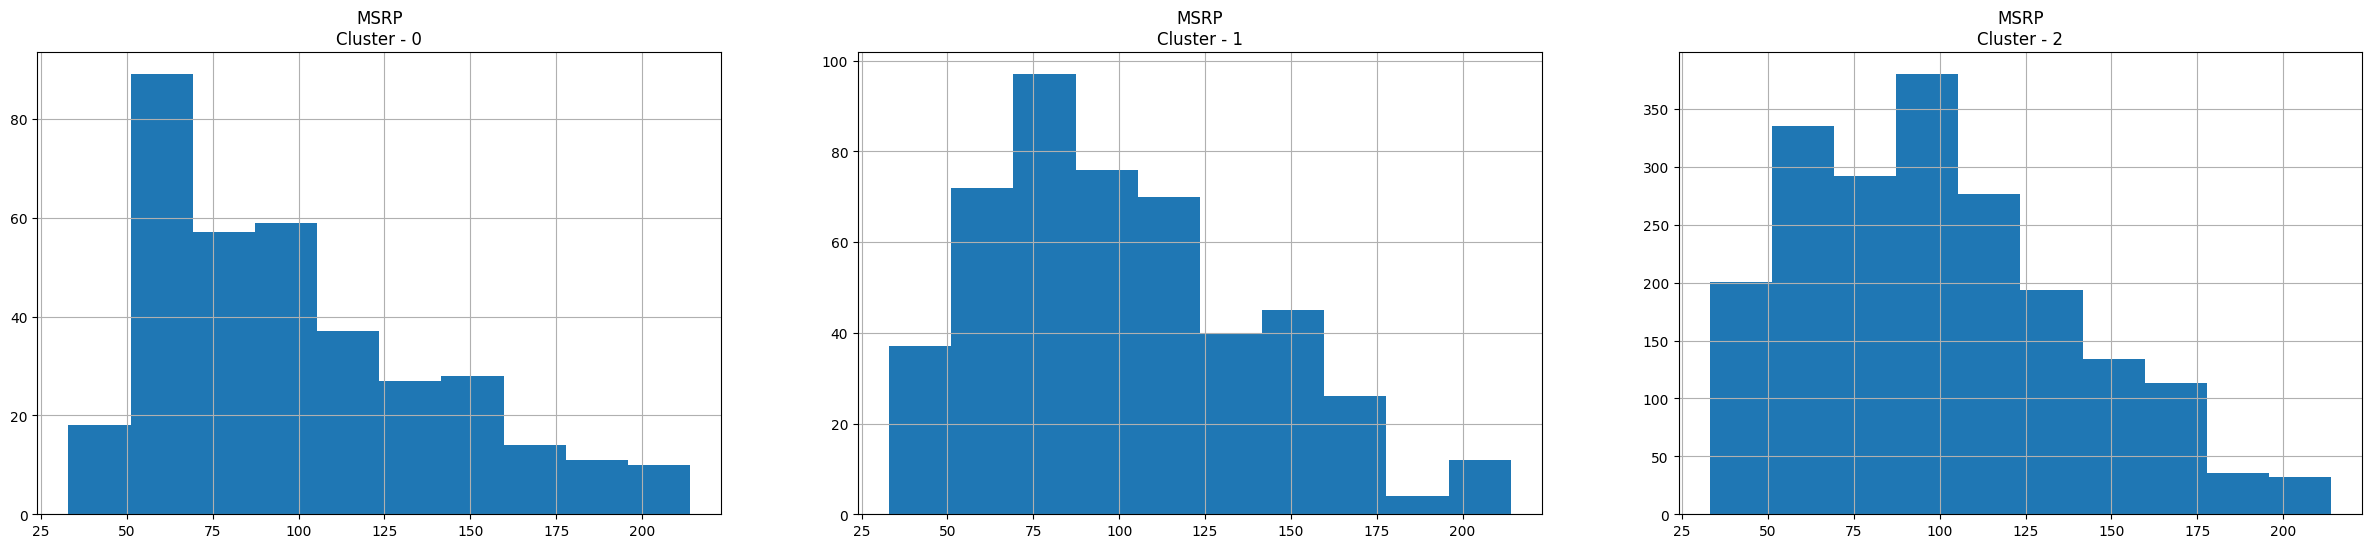

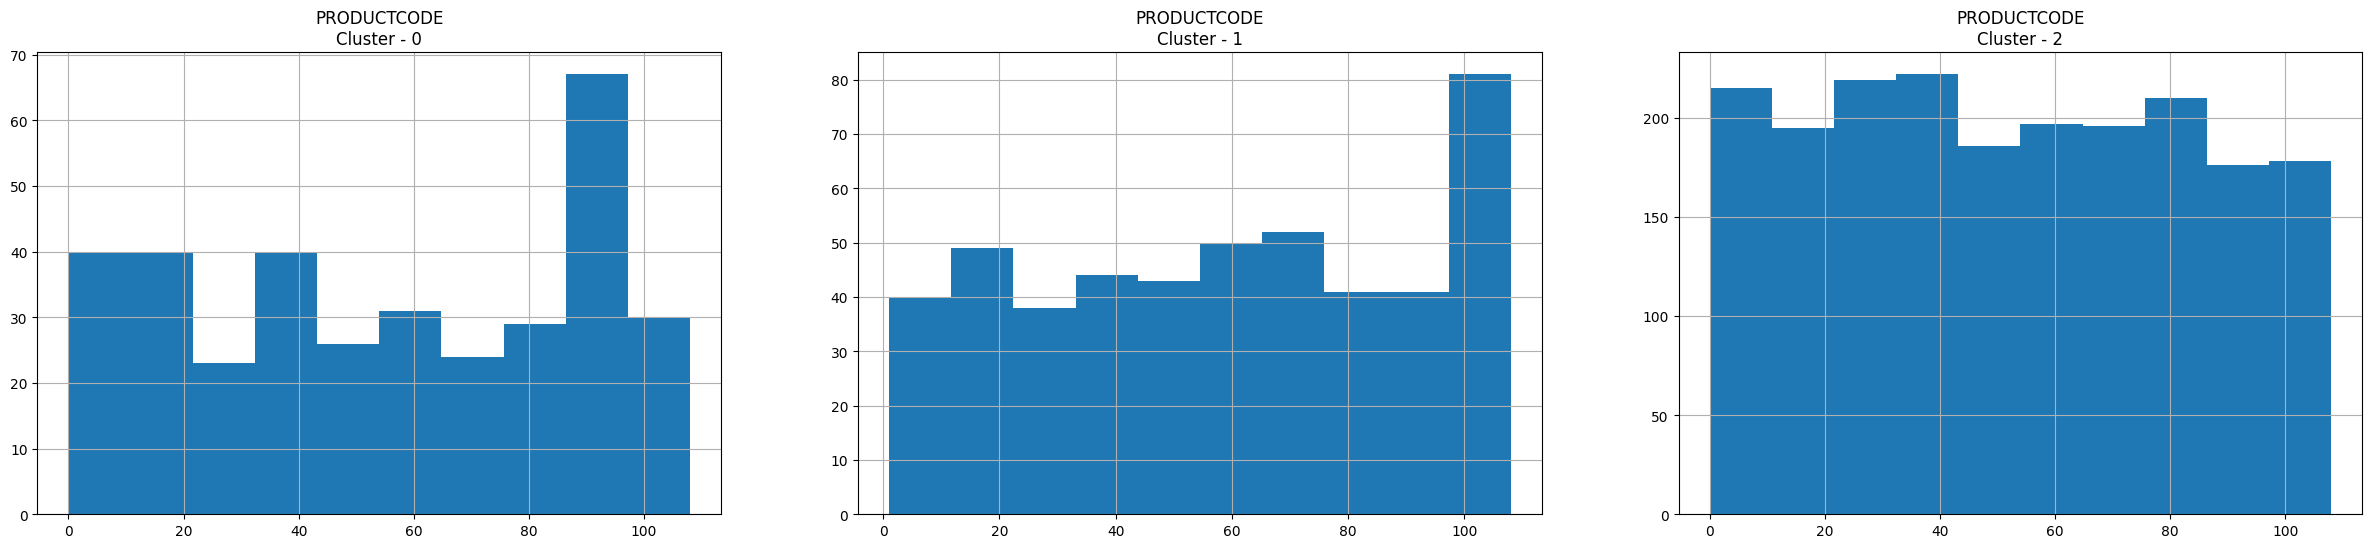

In [ ]:
# plot histogram for each feature based on cluster
for i in sales_df.columns[:8] :
  plt.figure(figsize = (30, 6))
  for j in range(3) :
    plt.subplot(1, 3, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist()
    plt.title('{}\nCluster - {}'.format(i, j))

  plt.show()

In [ ]:
# Reduce the original data to 3 dimension using PCA to visualize the clusters
pca = PCA(n_components = 3)
prin_comp = pca.fit_transform(sales_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.486273,-1.212936,0.966482
1,-0.784683,-1.007978,1.516348
2,1.431437,0.154343,0.364957
3,1.288448,-0.214462,-0.597915
4,1.976026,-0.127821,-1.028696


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster' : labels})], axis = 1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-0.486273,-1.212936,0.966482,2
1,-0.784683,-1.007978,1.516348,2
2,1.431437,0.154343,0.364957,2
3,1.288448,-0.214462,-0.597915,2
4,1.976026,-0.127821,-1.028696,2


In [ ]:
# Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3',
                    color = 'cluster', symbol = 'cluster', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))